In [1]:
"""
Make of a neural network with numpy
"""

# Importing libraries

import numpy as np
from numpy import ndarray as Tensor

from typing import (Dict, Tuple, Callable, 
                    Sequence, Iterator, NamedTuple)
Func = Callable[[Tensor], Tensor]

import matplotlib.pyplot as plt

# Defining the Loss function to minimize

class MeanSquareError:
    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        return np.sum((predicted - actual)**2) / len(actual)
    
    def grad(self, predicted: Tensor, actual: Tensor) -> Tensor:
        return 2 * (predicted - actual) / len(actual)
    


# Class constructing a generic layer

class Layer:
    def __init__(self) -> None:

        # Stocking the parameters values and gradients in dictionnaries
        self.params: Dict[str, Tensor] = {}
        self.grads: Dict[str, Tensor] = {}

    def forward(self, inputs: Tensor) -> Tensor:
        raise NotImplementedError

    def backward(self, grad: Tensor) -> Tensor:
        raise NotImplementedError


# Class constructing a linear layer of neurons

class Linear(Layer):
    """
    Inputs are of size (batch_size, input_size)
    Outputs are of size (batch_size, output_size)
    """
    def __init__(self, input_size: int, output_size: int) -> None:
    
        # Inherit from base class Layer
        super().__init__()
        
        # Initialize the weights and bias with random values
        self.params["w"] = np.random.randn(input_size, output_size)
        self.params["b"] = np.random.randn(output_size)

    def forward(self, inputs: Tensor) -> Tensor:
        """
        inputs shape is (batch_size, input_size)
        """
        self.inputs = inputs
        
        # Compute the feed forward pass
        """
        (b,i) @ (i,o) + (1,o) = (b,o)
        """
        return inputs @ self.params["w"] + self.params["b"]
        
     
        
    def backward(self, grad: Tensor) -> Tensor:
        """
        grad shape is (batch_size, output_size)
        """
        # Compute the gradient parameters for the layer
        self.grads["w"] =  np.transpose(self.inputs) @ grad
        """
        (i,b) @ (b,o) = (i,o)
        """
        self.grads["b"] = grad
        """
        (b,o) 
        """
        # Compute the feed backward pass
        """
        (b,o) @ (o,i) = (b,i)
        """
        return grad @ np.transpose(self.params["w"])


#Defining possible activation functions

def tanh(x: Tensor) -> Tensor:
    return np.tanh(x)

def tanh_prime(x: Tensor) -> Tensor:
    return 1 - (np.tanh(x))**2

def sigmoid(x: Tensor) -> Tensor:
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x: Tensor) -> Tensor:
    return sigmoid(x)*(1 - sigmoid(x))


# Class constructing an activation layer

class Activation(Layer):
    """
    An activation layer just applies a function
    elementwise to its inputs
    """
    def __init__(self, f: Func, f_prime: Func) -> None:
        super().__init__()
        self.f = f
        self.f_prime = f_prime

    def forward(self, inputs: Tensor) -> Tensor:
        self.inputs = inputs
        return self.f(inputs)

    def backward(self, grad: Tensor) -> Tensor:
        return self.f_prime(self.inputs) * grad
    

# Class constructing the network, doing the full forward and backward pass and optimizing the parameters

class NeuralNet:
    def __init__(self, layers: Sequence[Layer], lr: float = 0.01) -> None:
        self.layers = layers
        self.lr = lr 
        """
        Learning rate
        """

    def forward(self, inputs: Tensor) -> Tensor:
        """
        The forward pass takes the layers in order
        """
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs

    def backward(self, grad: Tensor) -> Tensor:
        """
        The backward pass is the other way around
        """
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
        return grad
    
    def optimize(self) -> None:
        """
        Optimize the paramaters value at each step
        """
        for layer in self.layers:
                for name in layer.params.keys():
                    layer.params[name] = layer.params[name] - self.lr * layer.grads[name]

Epoch =  0  Loss =  1.3721618407697191  Acc =  -37.21618407697191
Epoch =  100  Loss =  0.13285365927968193  Acc =  86.7146340720318
Epoch =  200  Loss =  0.03741103911909651  Acc =  96.25889608809035
Epoch =  300  Loss =  0.012882859349418373  Acc =  98.71171406505816
Epoch =  400  Loss =  0.0046260520228134545  Acc =  99.53739479771866
Epoch =  500  Loss =  0.0016841870543626862  Acc =  99.83158129456373
Epoch =  600  Loss =  0.0006162367765812658  Acc =  99.93837632234187
Epoch =  700  Loss =  0.00022589330199478916  Acc =  99.97741066980052
Epoch =  800  Loss =  8.286121321709574e-05  Acc =  99.9917138786783
Epoch =  900  Loss =  3.0402269469526985e-05  Acc =  99.99695977305305
Epoch =  1000  Loss =  1.1155774355517654e-05  Acc =  99.99888442256444
Epoch =  1100  Loss =  4.093621454796761e-06  Acc =  99.99959063785452
Epoch =  1200  Loss =  1.5021760684754135e-06  Acc =  99.99984978239316
Epoch =  1300  Loss =  5.51233872111475e-07  Acc =  99.99994487661279
Epoch =  1400  Loss =  2

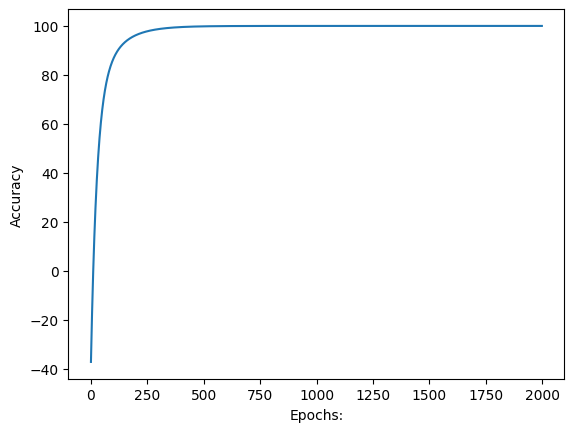

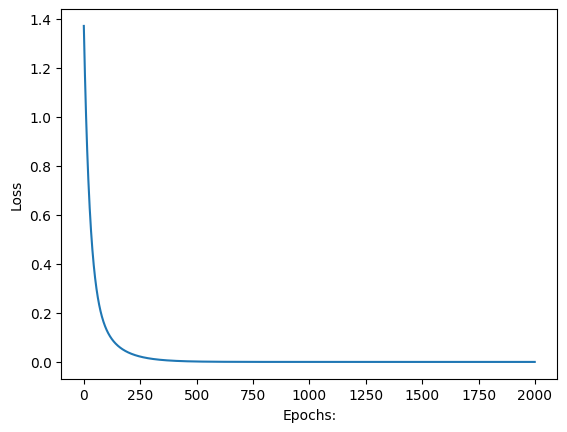


X => y => y_pred => round(y_pred)
[0 0] => [0] => [1.87457199e-05] => [0.]
[1 0] => [1] => [0.99997673] => [1.]
[0 1] => [1] => [0.99997673] => [1.]
[1 1] => [0] => [2.32682919e-05] => [0.]
Epoch =  0  Loss =  0.2499230370568215  Acc =  75.00769629431785
Epoch =  100  Loss =  0.22658918262710873  Acc =  77.34108173728913
Epoch =  200  Loss =  0.20455380611251506  Acc =  79.5446193887485
Epoch =  300  Loss =  0.18397753173242104  Acc =  81.60224682675789
Epoch =  400  Loss =  0.16514685052443362  Acc =  83.48531494755665
Epoch =  500  Loss =  0.14821609157799825  Acc =  85.17839084220017
Epoch =  600  Loss =  0.13316183329641862  Acc =  86.68381667035814
Epoch =  700  Loss =  0.11985709515751634  Acc =  88.01429048424836
Epoch =  800  Loss =  0.10813878538795385  Acc =  89.18612146120462
Epoch =  900  Loss =  0.09783829149130896  Acc =  90.2161708508691
Epoch =  1000  Loss =  0.08879217784704511  Acc =  91.12078221529549
Epoch =  1100  Loss =  0.08084678230331202  Acc =  91.91532176966

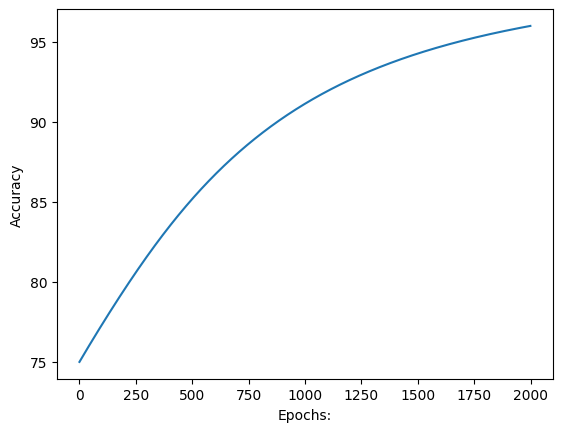

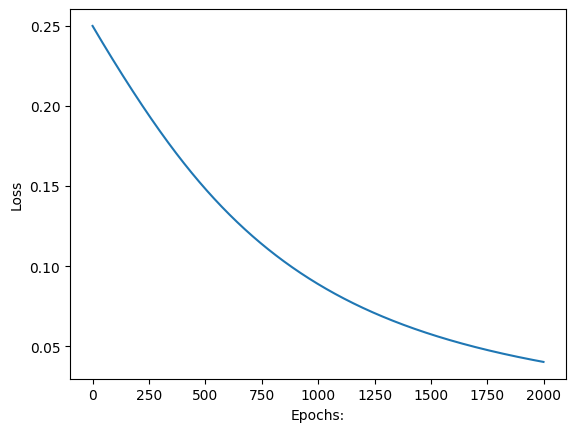


X => y => y_pred => round(y_pred)
[0 0] => [0] => [0.16309853] => [0.]
[1 0] => [1] => [0.76571092] => [1.]
[0 1] => [1] => [0.76581459] => [1.]
[1 1] => [0] => [0.15651944] => [0.]


In [2]:
#Defining the training routine of the network
                    
def train(net: NeuralNet, inputs: Tensor, targets: Tensor,
          loss: MeanSquareError,
          num_epochs: int = 5000) -> None:
    Loss_list = []
    Acc_list = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0

        predicted = net.forward(inputs)
        epoch_loss = loss.loss(predicted, targets)
        epoch_grad = loss.grad(predicted, targets)
        net.backward(epoch_grad)
        net.optimize()
        acc = (1 - epoch_loss) * 100
        Loss_list.append(epoch_loss)
        Acc_list.append(acc)
            
        # Print status every 100 iterations
        if epoch % 100 == 0:
            print("Epoch = ", epoch, " Loss = ", epoch_loss," Acc = ", acc)
    print("Predictions = ", predicted)
    
    
    plt.plot(Acc_list)
    plt.ylabel('Accuracy')
    plt.xlabel("Epochs:")
    plt.show()
 
    plt.plot(Loss_list)
    plt.ylabel('Loss')
    plt.xlabel("Epochs:")
    plt.show()



#####################################################################################################
#####################################################################################################

MSE = MeanSquareError()

net1 = NeuralNet([
    Linear(input_size=2, output_size=1),
])

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([[0], [1], [1], [0]])

def print_xor_results(inputs: Tensor, targets: Tensor, predictions: Tensor) -> None:
    print('\nX => y => y_pred => round(y_pred)')
    for x, y, z in zip(inputs, targets, predictions):
        print(f'{x} => {y} => {z} => {z.round()}')

def train_xor(net: NeuralNet, inputs: Tensor, targets: Tensor, loss: MeanSquareError = MSE, epochs: int = 2000):
    train(net, inputs, targets, loss=loss, num_epochs=epochs)
    predictions = net.forward(inputs)
    print_xor_results(inputs, targets, predictions)


train_xor(net1, X, y)

net2 = NeuralNet([
    Linear(input_size=2, output_size=4),
    Activation(tanh, tanh_prime),
    Linear(input_size=4, output_size=6),
    Activation(sigmoid, sigmoid_prime),
    Linear(input_size=6, output_size=6),
    Activation(tanh, tanh_prime),
    Linear(input_size=6, output_size=4),
    Activation(sigmoid, sigmoid_prime),
    Linear(input_size=4, output_size=1),
    Activation(sigmoid, sigmoid_prime),

])

train_xor(net2, X, y)

In [3]:
import pandas as pd

/tmp/ipykernel_19254/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
dataset = pd.read_csv('dataset.csv', usecols=np.arange(0,12), nrows=21)

print(dataset.values)

labels = pd.read_csv('dataset.csv', usecols=["label"], nrows=21)

print(labels.values)

[[ 3.55701209e+00  0.00000000e+00  4.06110880e-01  7.39373450e-01
  -1.12894930e-02  9.40775900e+00  8.77860370e-01  1.47985430e-03
   5.91111800e-02  1.25963970e-01  7.29076500e-01  1.46695210e+00]
 [ 2.47418200e-01  0.00000000e+00  4.49389500e+00  6.05469300e-01
   9.28819100e-02  9.24902300e+00  1.89530300e-01  3.49832960e-02
   3.62376830e-02  9.67957450e-02  1.15043186e-01  2.87693360e+00]
 [ 3.91778643e-01  4.00000000e+00  3.87803480e+00  1.37667060e-01
  -1.49317880e-02  9.51811800e+00  5.35451050e-01  2.67650800e-02
  -6.87091500e-02  1.07934050e-01  6.31426930e-01  1.89743090e+00]
 [ 8.79783900e-02  1.00000000e+00  4.38029100e+00  4.69657780e-01
   1.17981710e-03  9.16558100e+00  6.32804630e-01  2.04687420e-02
  -2.43646450e-02  6.25239100e-02  8.39157900e-01  2.48249670e+00]
 [ 9.53482539e-01  1.00000000e+00  3.46662620e+00  9.03056400e-01
   8.04744800e-03  9.18995400e+00  1.67587030e-01  3.04238680e-02
   9.92027300e-02  6.95781260e-02  1.99639650e-01  2.33958960e+00]
 [ 4.

Epoch =  0  Loss =  0.7329862754650813  Acc =  26.701372453491867
Epoch =  100  Loss =  0.6981254235560673  Acc =  30.187457644393266
Epoch =  200  Loss =  0.6730838414684384  Acc =  32.691615853156165
Epoch =  300  Loss =  0.654796221743469  Acc =  34.52037782565311
Epoch =  400  Loss =  0.641201634680119  Acc =  35.8798365319881
Epoch =  500  Loss =  0.6308300248378984  Acc =  36.91699751621016
Epoch =  600  Loss =  0.6226838764348667  Acc =  37.73161235651333
Epoch =  700  Loss =  0.6161032090044655  Acc =  38.389679099553454
Epoch =  800  Loss =  0.6106466538923515  Acc =  38.93533461076485
Epoch =  900  Loss =  0.6060121526013267  Acc =  39.39878473986733
Epoch =  1000  Loss =  0.6019878172496267  Acc =  39.80121827503733
Epoch =  1100  Loss =  0.5984215182165002  Acc =  40.15784817834997
Epoch =  1200  Loss =  0.5952016939317465  Acc =  40.47983060682535
Epoch =  1300  Loss =  0.592244950502989  Acc =  40.7755049497011
Epoch =  1400  Loss =  0.5894878596007234  Acc =  41.05121403

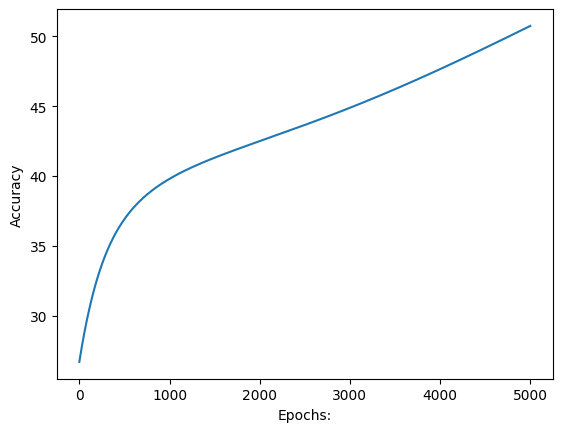

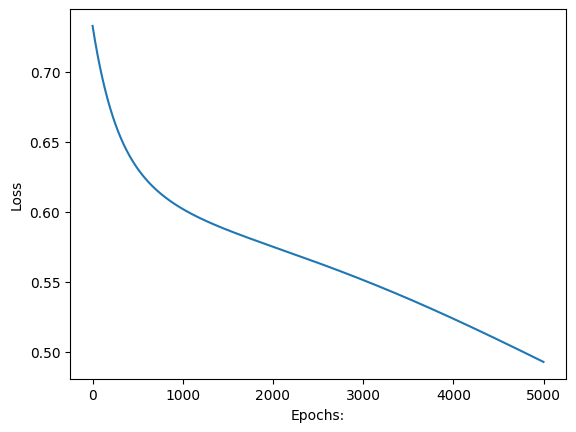

In [7]:
net3 = NeuralNet([
    Linear(input_size=12, output_size=4),
    Activation(tanh, tanh_prime),
    Linear(input_size=4, output_size=6),
    Activation(sigmoid, sigmoid_prime),
    Linear(input_size=6, output_size=6),
    Activation(tanh, tanh_prime),
    Linear(input_size=6, output_size=4),
    Activation(sigmoid, sigmoid_prime),
    Linear(input_size=4, output_size=1),
    Activation(sigmoid, sigmoid_prime),

])

train(net3, inputs=dataset.values, targets=labels.values, loss=MSE)